In [1]:
from bs4 import BeautifulSoup
import sqlite3, os, pandas as pd

In [2]:
# Take a look at this HTML Table of Volunteer Hours

<table>
    <tr> <th>Name</th><th>Week 1</th><th>Week 2</th><th>Week 3</th> </tr>
    <tr> <td>Therese</td><td>13</td><td>4</td><td>5</td> </tr>
    <tr> <td>Carl</td><td>5</td><td>7</td><td>8</td> </tr>
    <tr> <td>Marie</td><td>2</td><td>9</td><td>11</td> </tr>
</table>

In [5]:
# Warmup 1 : Parse this in Beautiful Soup


html = '''<table>
    <tr> <th>Name</th><th>Week 1</th><th>Week 2</th><th>Week 3</th> </tr>
    <tr> <td>Therese</td><td>13</td><td>4</td><td>5</td> </tr>
    <tr> <td>Carl</td><td>5</td><td>7</td><td>8</td> </tr>
    <tr> <td>Marie</td><td>2</td><td>9</td><td>11</td> </tr>
</table>'''

# set up a BeautifulSoup object
bs_obj = BeautifulSoup(html, 'html.parser')

# get the column names by finding all header elements
header_elements = bs_obj.find_all("th")
[e.get_text() for e in header_elements]


['Name', 'Week 1', 'Week 2', 'Week 3']

In [6]:
# Warmup 2: make a dictionary where the key is the name and the value is the total hours

# get all row elements, but not the first one
row_elements = bs_obj.find_all("tr") [1:]
#print(row_elements)

# make an empty dict
hours_dict = {}

# iterate through the row_elements
for row in row_elements:
    # find all "td" elements in this row
    td_elements = row.find_all("td")
    #print(td_elements)
    # get the name and the 3 ints
    name = td_elements[0].get_text()
    week1 = td_elements[1].get_text()
    week2 = td_elements[2].get_text()
    week3 = td_elements[3].get_text()
    total = int(week1) + int(week2) + int(week3)
    #print(name, total)
    
    # add the dict entry
    hours_dict[name] = total
hours_dict


{'Therese': 22, 'Carl': 20, 'Marie': 22}

In [14]:
# Warmup 2 Be sure you have bus.db in this directory

## April 20: DataBase1

### Learning Objectives:

- Explain how a database is different from a CSV file or a JSON file
- Use SQLite to connect to a database and pandas to query the database
- Write basic queries on a database using SELECT, FROM, WHERE, ORDER BY, and LIMIT



To start, we will go over the slides to explain what Databases and SQL are


In [15]:
# Get the Bus data from 'bus.db'

db_name = "bus.db"
assert os.path.exists(db_name)

# open a connection object to our database file
conn = sqlite3.connect(db_name)
# note: we need to close 'conn' when we are done, at the end of the notebook file
type(conn)


sqlite3.Connection

### Pandas has a .readsql function  `pd.read_sql(query, connection)`
- Allows us to process an SQL `query` on `connection`
- stores the result in a Pandas DataFrame

In [16]:
#this command helps us know the table names , we don't use the other info 
df = pd.read_sql("select * from sqlite_master", conn)
df

# notice that boarding is a table and routes is a table

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


### Databases are more structured than CSV and JSON files:
- all data contained inside one or more tables
- all tables must be named, all columns must be named 
- all values in a column must be the same type

In [17]:
# this command shows how our database was set up (not part of CS220)
# Note the table names, we will use them later
# Also note the column names
# finally, note that types are more formal, different than Python, and strictly enforced

for command in df["sql"]:
    print(command)

CREATE TABLE "boarding" (
"index" INTEGER,
  "StopID" INTEGER,
  "Route" INTEGER,
  "Lat" REAL,
  "Lon" REAL,
  "DailyBoardings" REAL
)
CREATE INDEX "ix_boarding_index"ON "boarding" ("index")
CREATE TABLE "routes" (
"index" INTEGER,
  "OBJECTID" INTEGER,
  "trips_routes_route_id" INTEGER,
  "route_short_name" INTEGER,
  "route_url" TEXT,
  "ShapeSTLength" REAL
)
CREATE INDEX "ix_routes_index"ON "routes" ("index")


### Most basic SQL query
Select Column(s) from Table

Can use * to mean "all columns"

In [18]:
# pandas shows its awesomeness again
# pandas allows us to write a SQL query and create a DataFrame
pd.read_sql("select * from routes", conn)

,index,OBJECTID,trips_routes_route_id,route_short_name,route_url,ShapeSTLength
0,0,63,8052,1,http://www.cityofmadison.com/Metro/schedules/R...,32379.426524
1,1,64,8053,2,http://www.cityofmadison.com/Metro/schedules/R...,96906.965571
2,2,65,8054,3,http://www.cityofmadison.com/Metro/schedules/R...,76436.645644
3,3,66,8055,4,http://www.cityofmadison.com/Metro/schedules/R...,64774.133485
4,4,67,8056,5,http://www.cityofmadison.com/Metro/schedules/R...,61216.722662
...,...,...,...,...,...,...
57,57,120,8109,78,http://www.cityofmadison.com/Metro/schedules/R...,95826.277218
58,58,121,8110,80,http://www.cityofmadison.com/Metro/schedules/R...,31831.761009
59,59,122,8111,81,http://www.cityofmadison.com/Metro/schedules/R...,26536.800591
60,60,123,8112,82,http://www.cityofmadison.com/Metro/schedules/R...,23287.980173


In [19]:
# repeat the step above but do this for boarding
pd.read_sql("select * from boarding", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11
...,...,...,...,...,...,...
3967,3967,6533,67,43.057329,-89.510756,16.88
3968,3968,6539,15,43.064361,-89.517233,15.53
3969,3969,6541,3,43.049934,-89.478167,2.56
3970,3970,6543,70,43.093289,-89.501726,0.11


In [20]:
# look at more slides

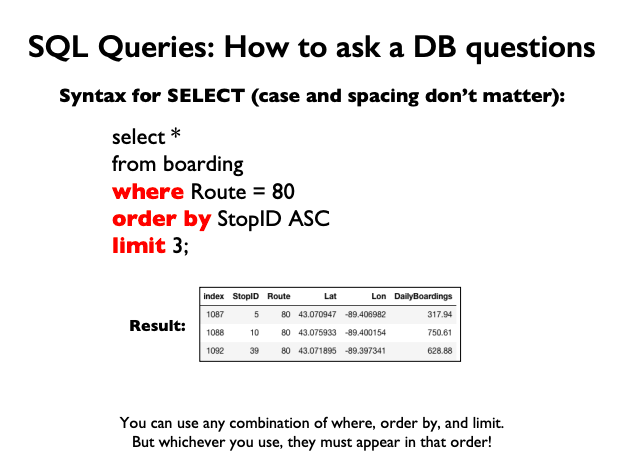

In [21]:
# more complicated queries

query = """
    SELECT StopID, DailyBoardings , Route  
    FROM boarding  
    WHERE route = 3 
    ORDER BY DailyBoardings DESC
    LIMIT 3
"""
pd.read_sql(query, conn)

,StopID,DailyBoardings,Route
0,581,109.95,3
1,7100,109.51,3
2,670,103.17,3


In [22]:
# queries can be written as their own strings
# multi-line strings in Python can be written using 3 "

query = """

"""


In [23]:
query = """

"""


In [24]:
# find the west-most bus stop

query = """
    select *
    from boarding
    order by Lon ASC
"""
western_bus_routes = pd.read_sql(query, conn)
print(western_bus_routes)
western_bus_routes.iloc[0]["Lon"]

      index  StopID  Route        Lat        Lon  DailyBoardings
0      3489    4400     55  42.995476 -89.564243           59.31
1      3490    4400     75  42.995476 -89.564243          168.50
2      3529    4559     55  42.987673 -89.553340            0.92
3      3530    4559     75  42.987673 -89.553340            0.57
4      3599    4812     55  42.988076 -89.552983            0.58
...     ...     ...    ...        ...        ...             ...
3967   2293    7269     33  43.091735 -89.261134            0.11
3968   2426    7717     33  43.098638 -89.261044            0.22
3969   2525    7944     33  43.089049 -89.260906            1.57
3970   2388    7560     33  43.085870 -89.260753            0.45
3971   2462    7811     33  43.085646 -89.260469            0.11

[3972 rows x 6 columns]


-89.564243

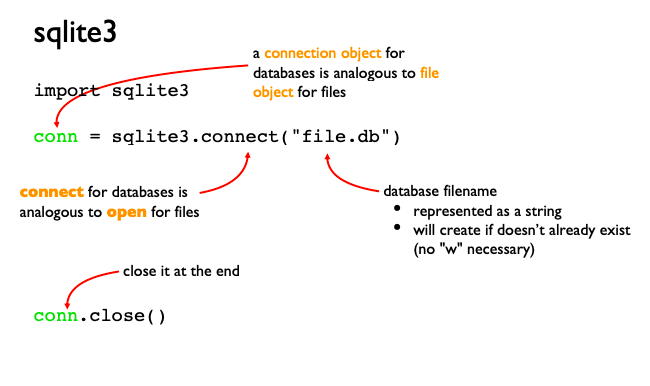

In [25]:
# don't forget to close your connection!
conn.close()